In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def load_image(filename):
    return cv2.imread('../../DATA/' + filename)

In [50]:
def cvt_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [51]:
def display_image(image):
    figure = plt.figure(figsize=(6, 5))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap = 'gray')

In [52]:
origin_rainbow_image = load_image('rainbow.jpg')    # ORIGINAL BGR OEPN-CV
cvt_rainbow_image = cvt_image(origin_rainbow_image) # CONVERTED TO RGB FOR SHOW

In [53]:
target_image = cvt_rainbow_image
target_image.shape

(550, 413, 3)

In [54]:
target_mask = np.zeros(
    target_image.shape[:2],
    np.uint8
)
target_mask.shape

(550, 413)

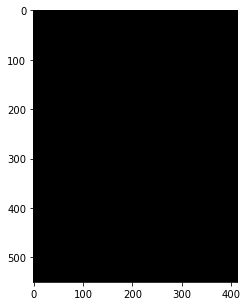

In [55]:
display_image(target_mask)

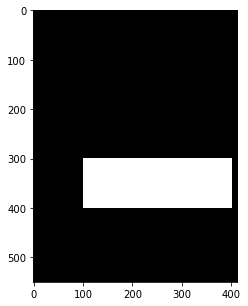

In [56]:
target_mask[300:400, 100:400] = 255
display_image(target_mask)

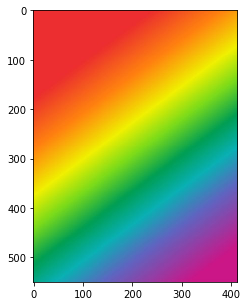

In [57]:
display_image(target_image)

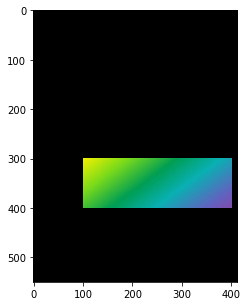

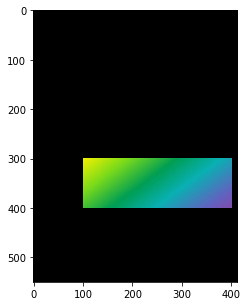

In [58]:
masked_target_image = cv2.bitwise_and(
    target_image,
    target_image,
    mask = target_mask
)
masked_target_histogram = masked_target_image.copy()
display_image(masked_target_image)
display_image(masked_target_histogram)

In [73]:
histogram_mask_values_red = cv2.calcHist(
    [masked_target_image],
    channels=[0],      # R G B
    mask = target_mask,
    histSize = [256],
    ranges = [0, 256]
)

In [70]:
histogram_values_red = cv2.calcHist(
    [masked_target_image],
    channels=[2],      # B G R
    mask = None,
    histSize = [256],
    ranges = [0, 256]
)

Text(0.5,1,'RED HISTOGRAM FOR MASKED RAINBOW')

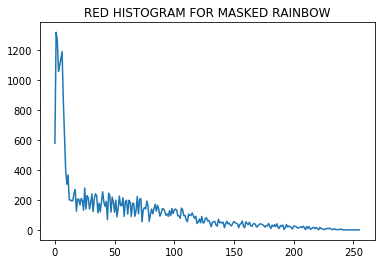

In [71]:
plt.plot(histogram_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')